# Example usage of difference_estimation_plot.py
## for mean/median comparison between groups


In [1]:
import numpy as np
import difference_estimation_plot as dpl

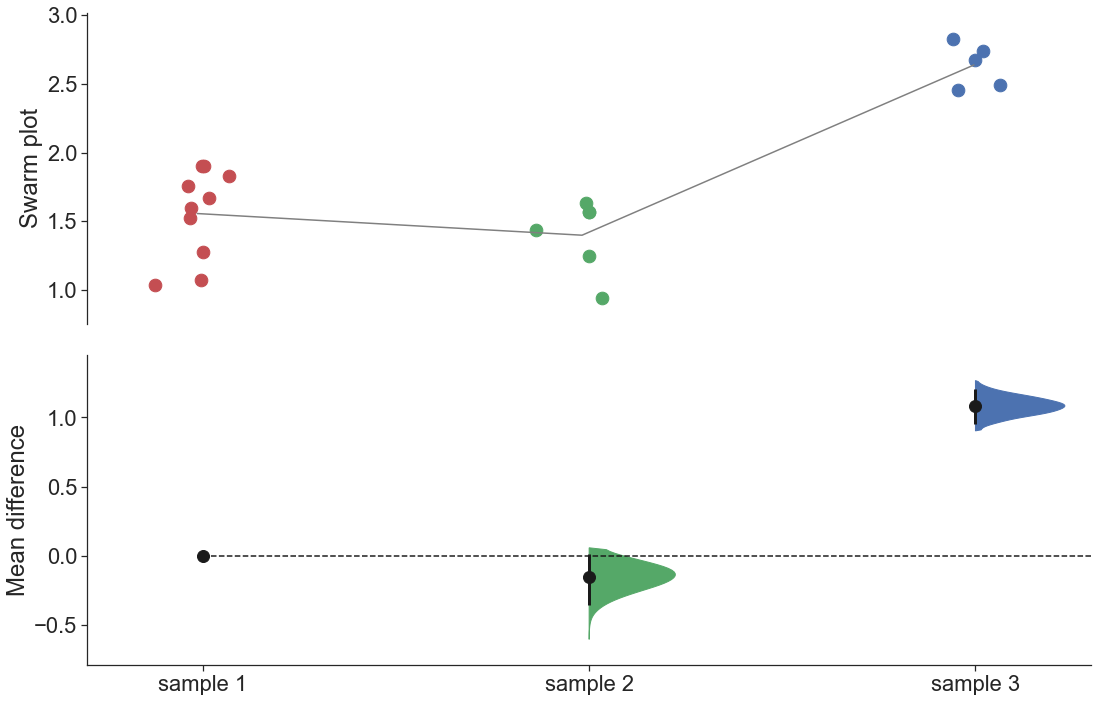

In [3]:
## Unpaired example:
input_ = {'sample 1': np.random.rand(10)+1, 'sample 2': np.random.rand(6) + 0.9,
     'sample 3': np.random.rand(5) +2}
KEYS = list(input_.keys())
fig,axs = dpl.estimation_plot(input_, [KEYS], SMOOTH=[1,3], operation=np.mean,
                              color_palette=['r', 'g', 'b'], stat=False, paired=False)

/usr/local/lib/python3.7/site-packages/seaborn/utils.py:238: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  maj_on = any(t.tick1On for t in ax_i.yaxis.majorTicks)
/usr/local/lib/python3.7/site-packages/seaborn/utils.py:239: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  min_on = any(t.tick1On for t in ax_i.yaxis.minorTicks)
/usr/local/lib/python3.7/site-packages/seaborn/utils.py:242: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = maj_on
/usr/local/lib/python3.7/site-packages/seaborn/utils.py:244: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2

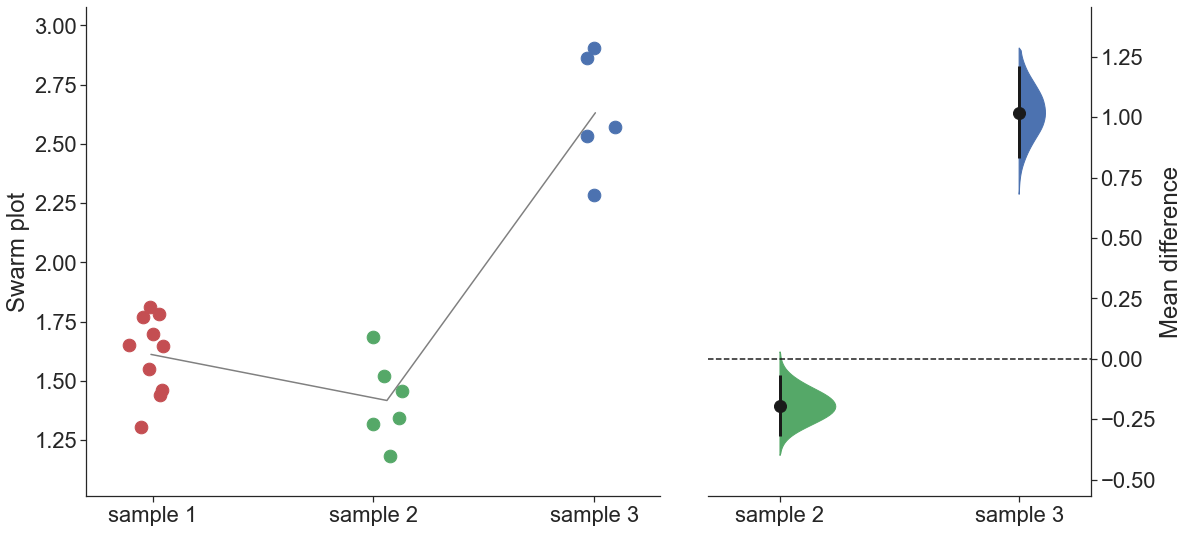

In [3]:
fig,axs = dpl.estimation_plot(input_, [KEYS], SMOOTH=[1,3], operation=np.mean,
                              color_palette=['r', 'g', 'b'], stat=False, paired=False,
                             vertical=0, EXC=0)

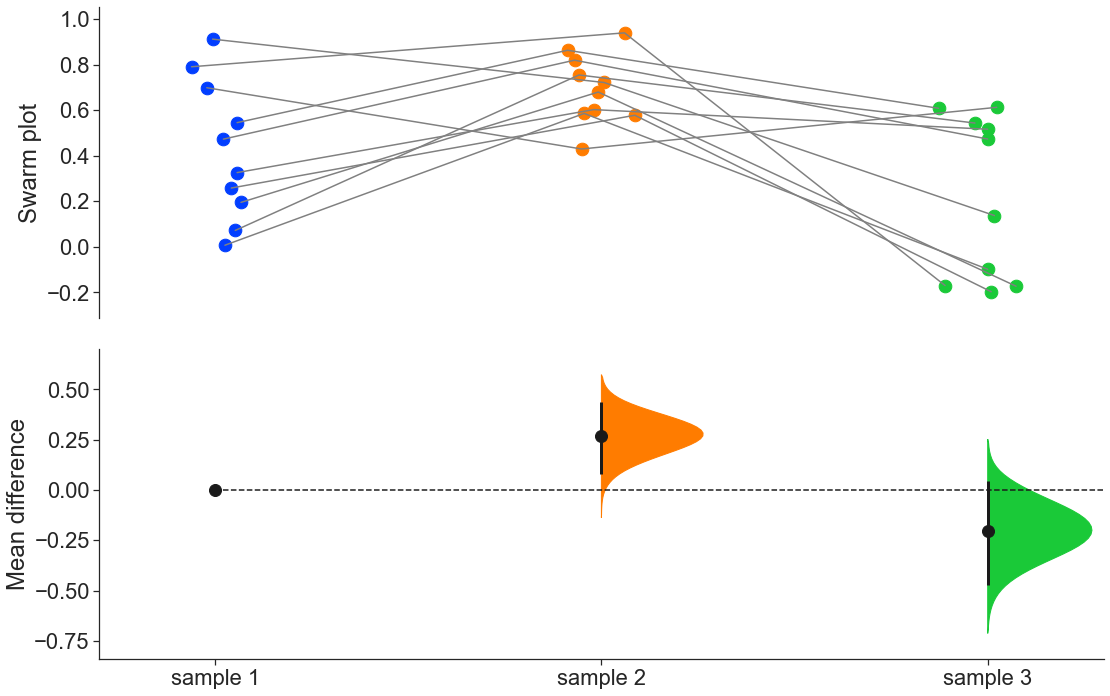

In [5]:
## Paired example:
input_ = {'sample 1': np.random.rand(10), 'sample 2': np.random.rand(10) + 0.4,
     'sample 3': np.random.rand(10) - 0.2}
KEYS = list(input_.keys())
fig,axs,m,ci = dpl.estimation_plot(input_, [KEYS], trend=1, SMOOTH=[1,3], paired=True)

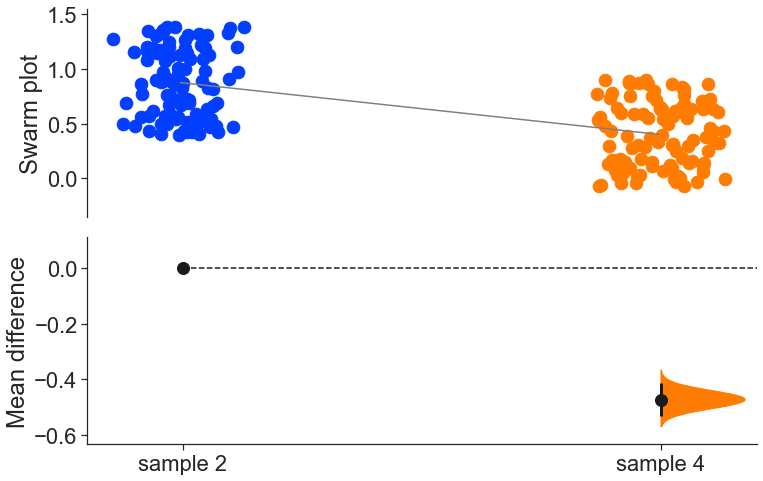

In [3]:
## Median difference example:
input_ = {'sample 1': np.random.rand(100), 'sample 2': np.random.rand(100) + 0.4,
     'sample 3': np.random.rand(200) - 0.2, 'sample 4': np.random.rand(100) - 0.1}
KEYS = list(input_.keys())
fig,axs = dpl.estimation_plot(input_, [[KEYS[1],KEYS[3]]], trend=1, operation=np.mean, nsh=10000,
                              stat=0, SMOOTH=[1,3])

In [17]:
lista = [[KEYS[1],KEYS[3]], [KEYS[1],KEYS[3]], [KEYS[1],KEYS[3]]] #, [KEYS[2]]]
nc = 0
for l in lista:
    nc+=len(l)

print(nc)

6


[[0.4077522537815223], [0.13491651953903086]] [[[0.3343298977677751, 0.4870620056807857]], [[0.05584394925327056, 0.21519664859155427]]]


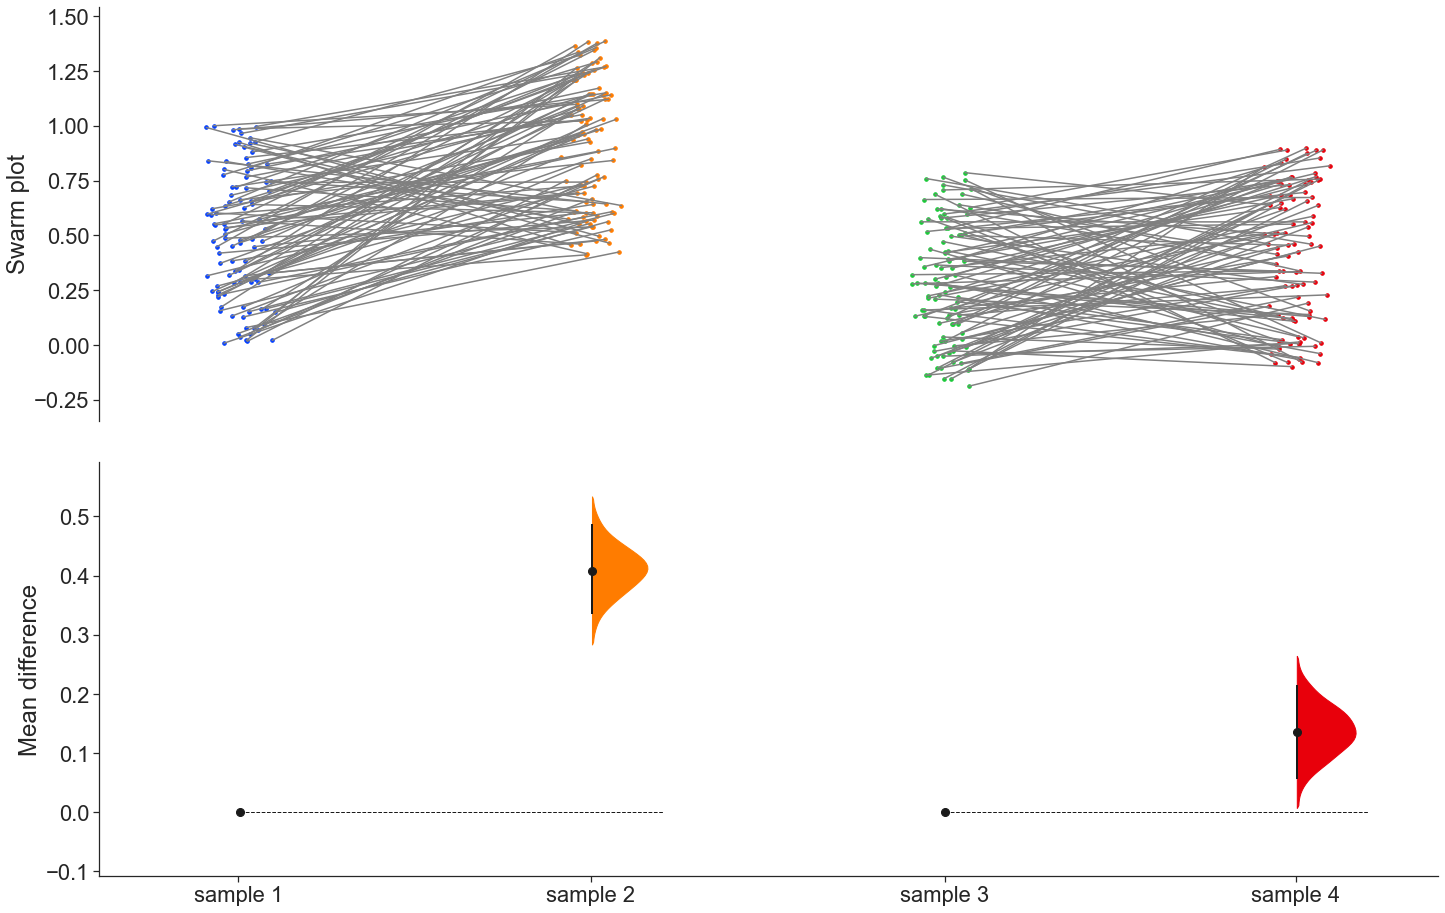

In [4]:
## Multiple controls
input_ = {'sample 1': np.random.rand(100), 'sample 2': np.random.rand(100) + 0.4,
         'sample 3': np.random.rand(100) - 0.2, 'sample 4': np.random.rand(100) - 0.1}
KEYS = list(input_.keys())
fig,axs,m,ci = dpl.estimation_plot(input_, [KEYS[:2], KEYS[2:]], paired=True,\
                          vertical=1, nsh=5000)
print(m,ci)